Shape: (11251, 15)
   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders  \
0     Maharashtra   Western       Healthcare             Auto       1   
1  Andhra Pradesh  Southern             Govt             Auto       3   
2   Uttar Pradesh   Central       Automobile             Auto       3   
3       Karnataka  Southern     Construction             Auto       2   
4         Gujarat   Western  Food Processing             Auto       2   

    Amount  Status  unnamed1  
0  23952.0     NaN       NaN  
1  23934.0     NaN       NaN  
2  2

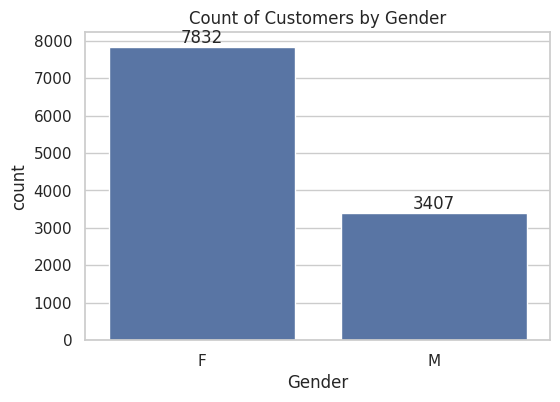

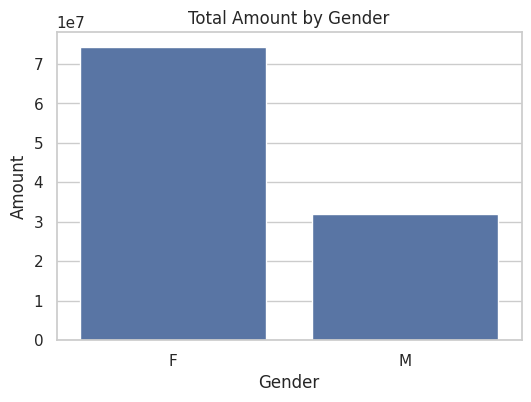

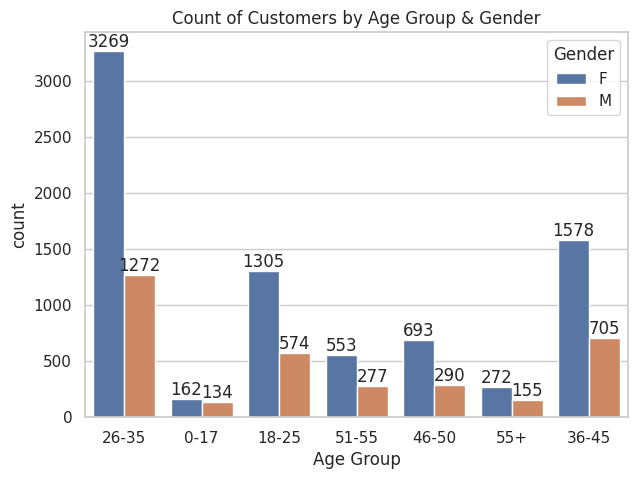

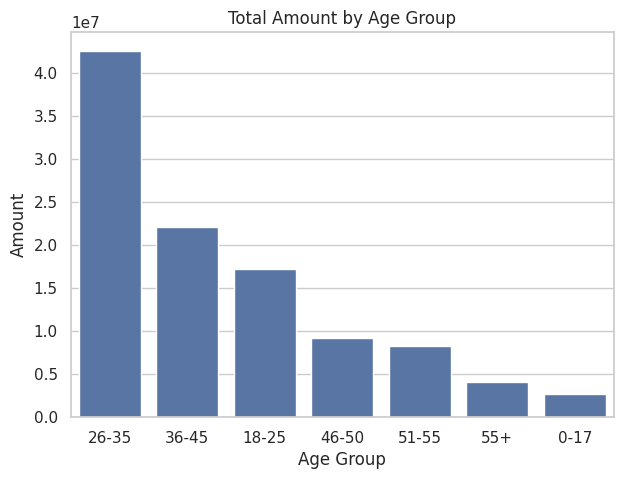

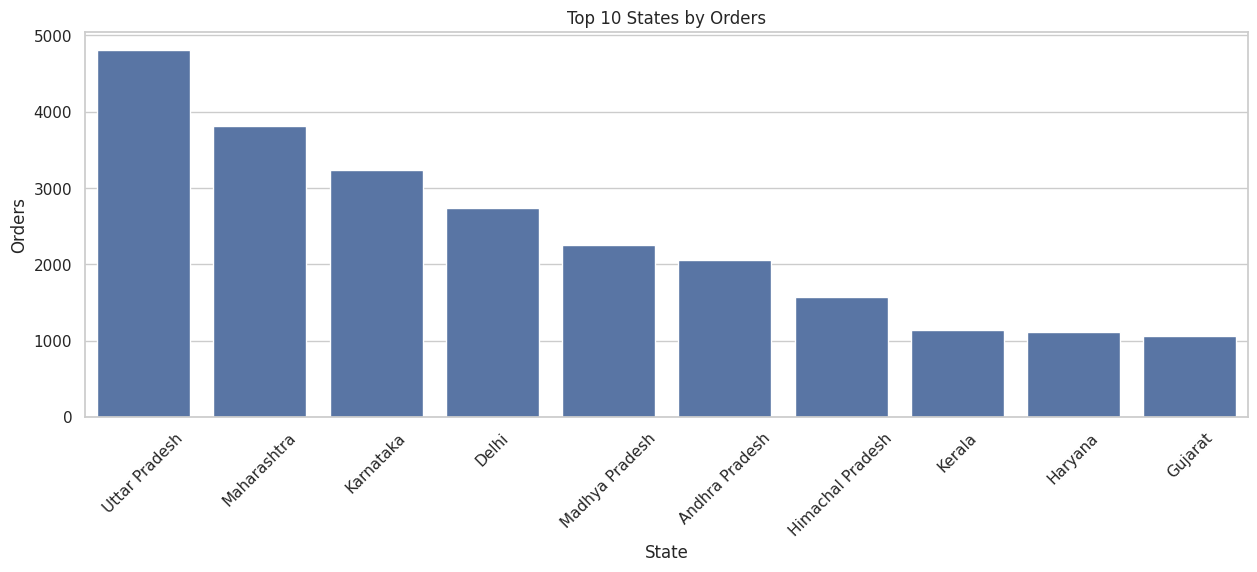

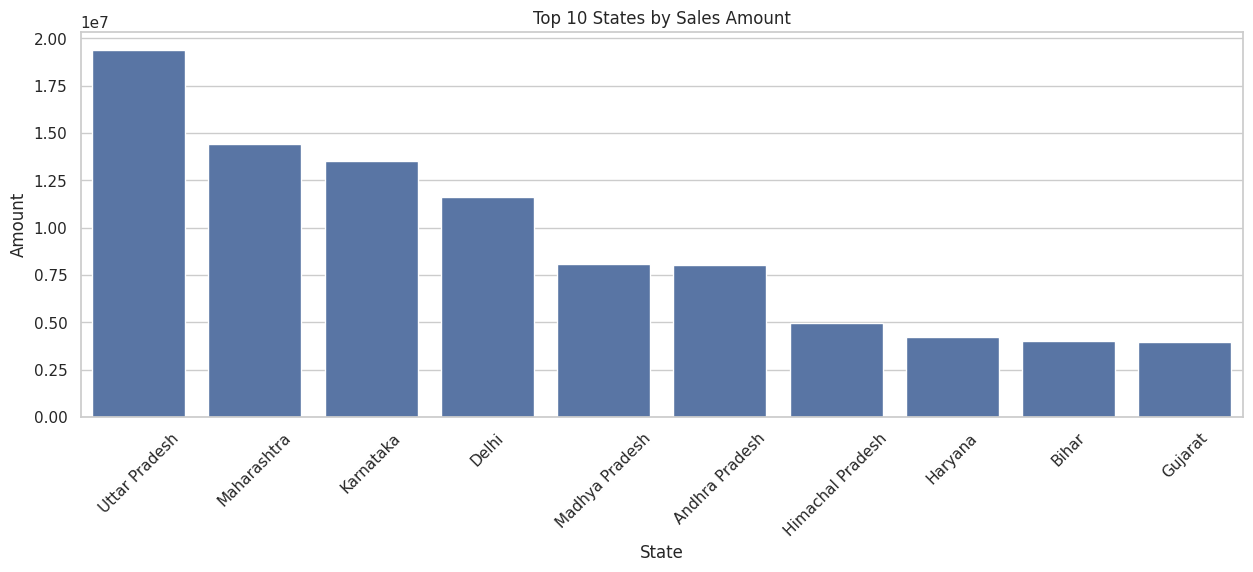

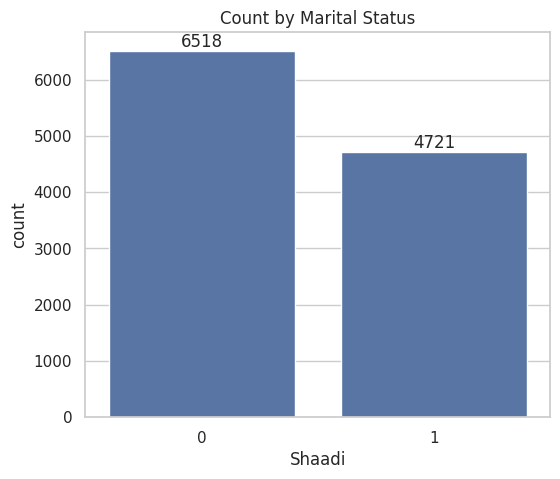

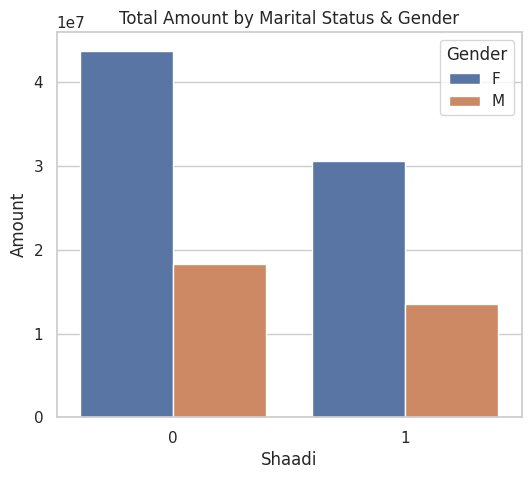

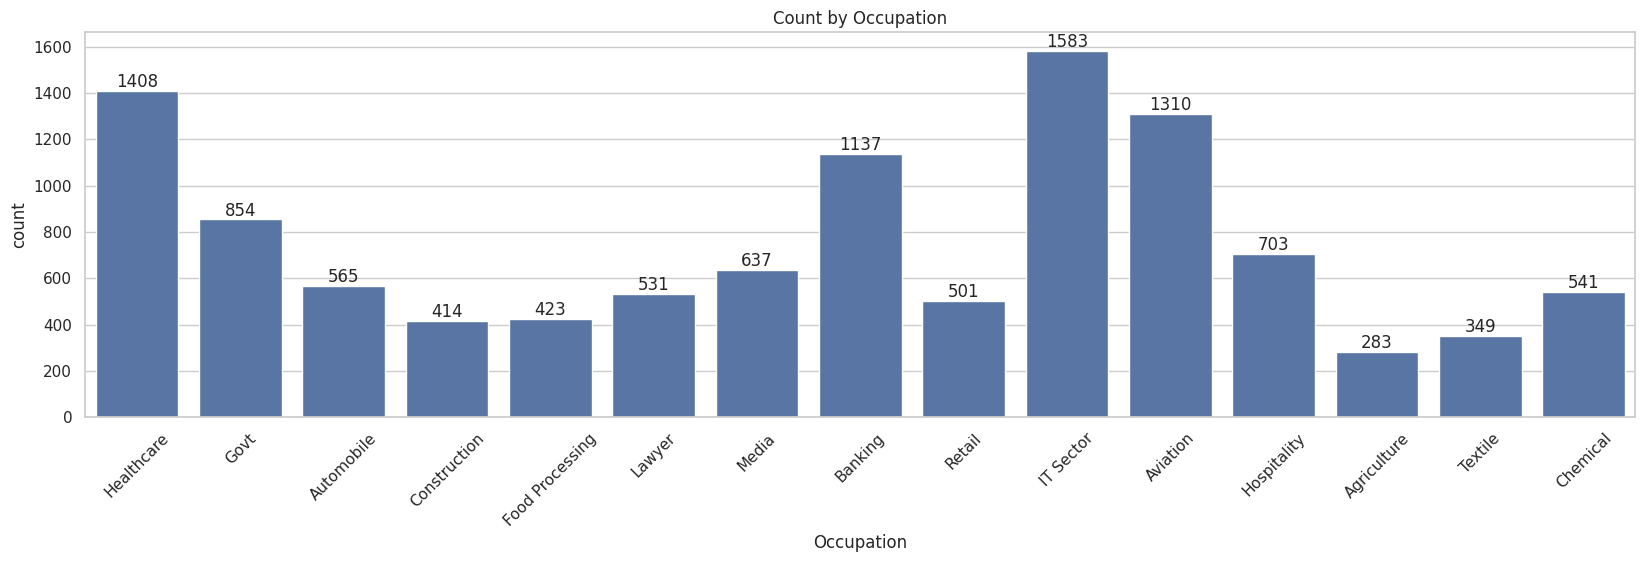

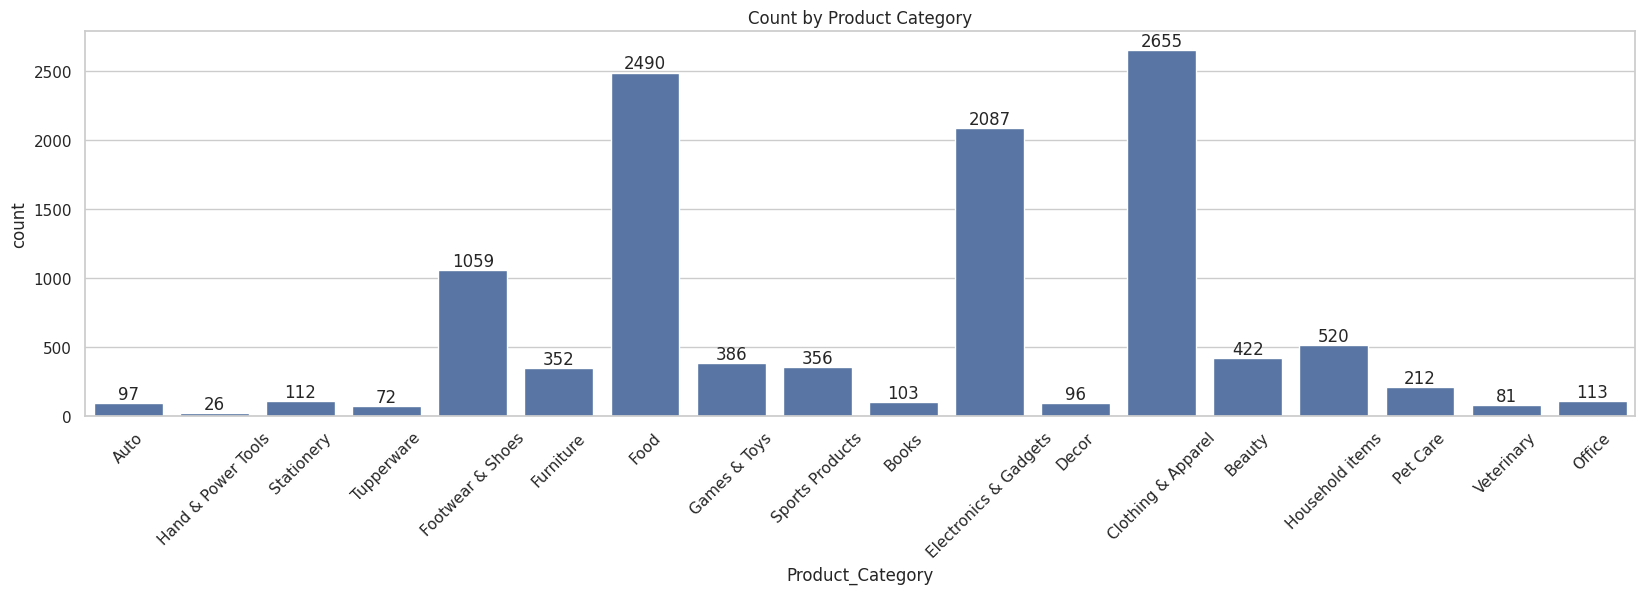

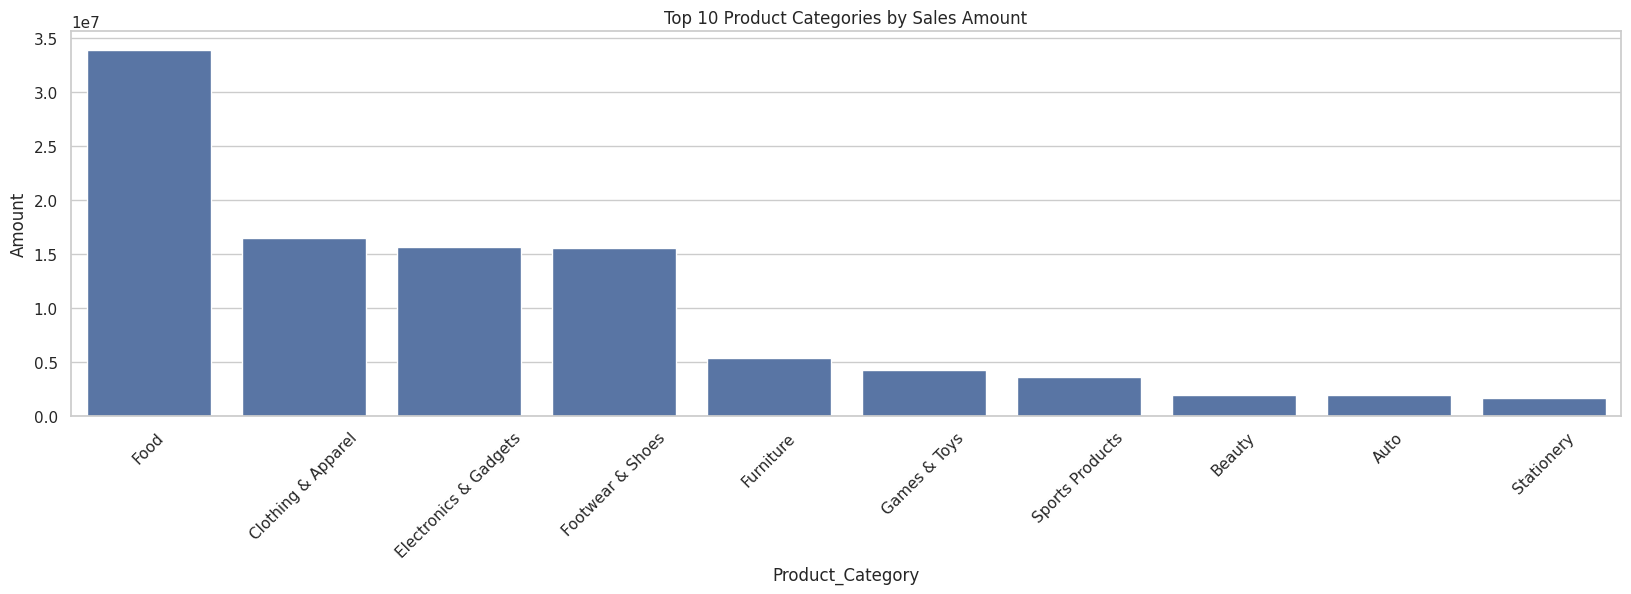

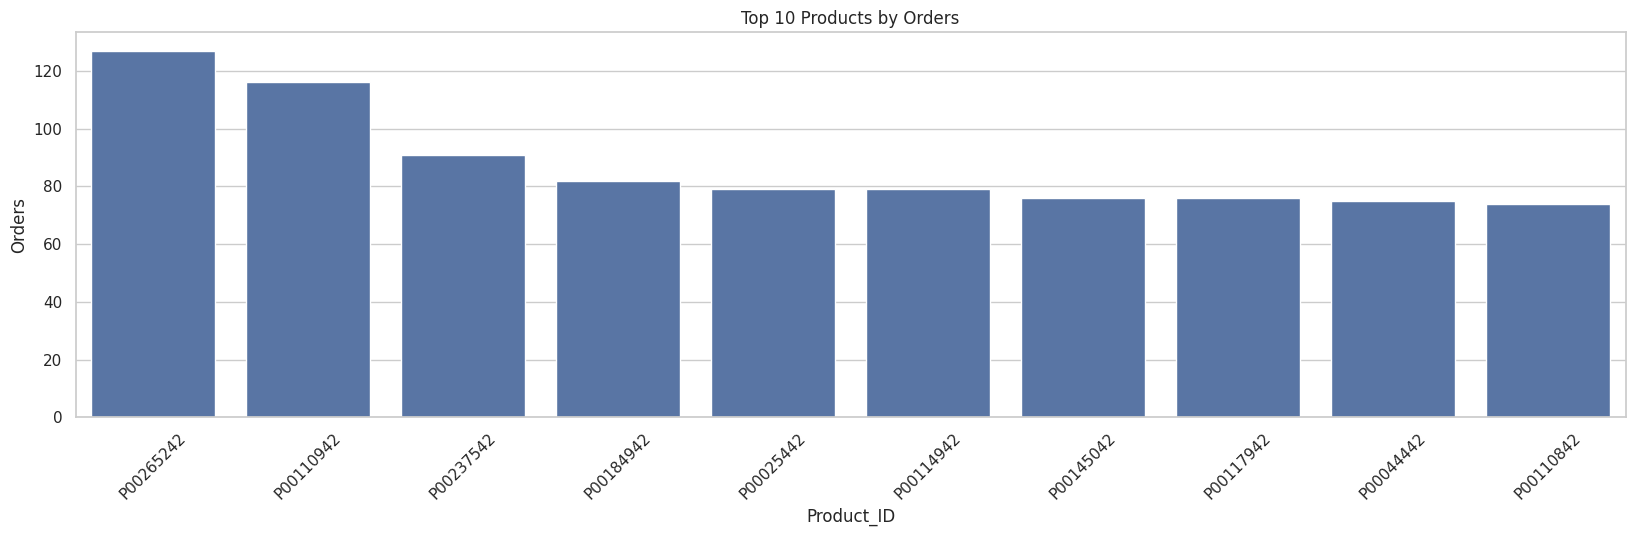

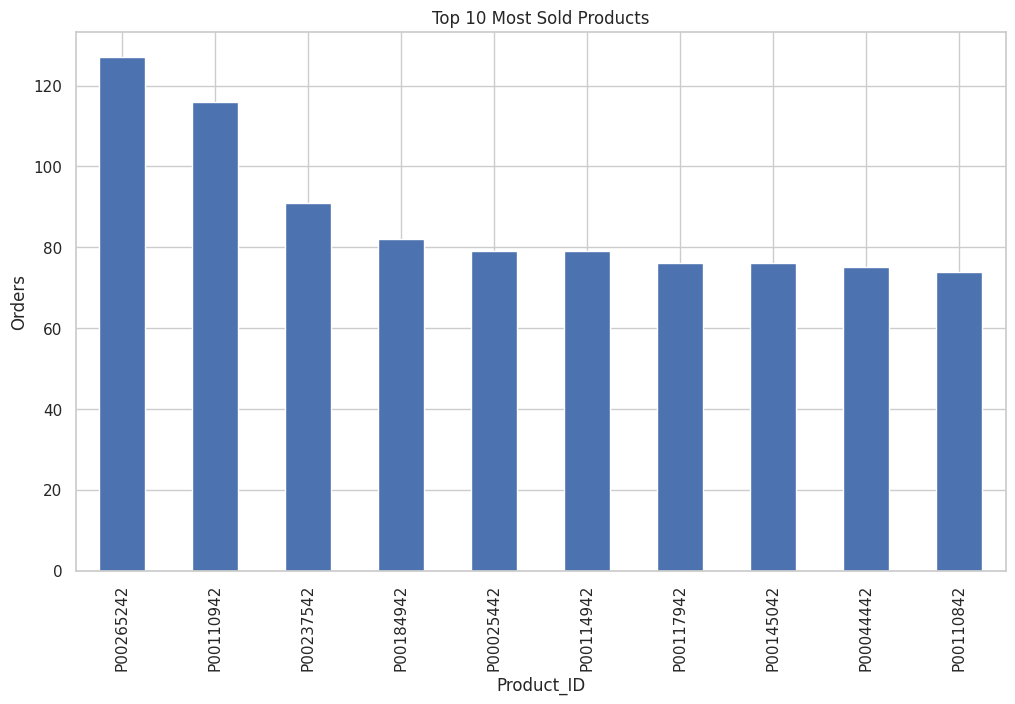

In [3]:
# =========================
# Importing Libraries
# =========================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# =========================
# Load Data
# =========================
df = pd.read_csv("Diwali_Sales_Data.csv", encoding="unicode_escape")
print("Shape:", df.shape)
print(df.head())
print(df.info())

# =========================
# Data Cleaning
# =========================
# Drop unrelated/blank columns (ignore if missing)
df.drop(['Status', 'unnamed1'], axis=1, inplace=True, errors='ignore')

# Drop null values
df.dropna(inplace=True)

# Convert Amount column to integer safely
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce').fillna(0).astype(int)

# Rename column properly
df.rename(columns={'Marital_Status': 'Shaadi'}, inplace=True)

print(df.info())
print(df.describe())

# =========================
# Descriptive Statistics
# =========================
print(df[['Age', 'Orders', 'Amount']].describe())

# =========================
# Visualization
# =========================
sns.set(style="whitegrid")

# Gender count
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Gender', data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Count of Customers by Gender")
plt.show()

# Gender vs Total Amount
sales_gen = df.groupby('Gender', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x='Gender', y='Amount', data=sales_gen)
plt.title("Total Amount by Gender")
plt.show()

# Age Group vs Gender (count)
plt.figure(figsize=(7,5))
ax = sns.countplot(x='Age Group', hue='Gender', data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Count of Customers by Age Group & Gender")
plt.show()

# Age Group vs Total Amount
sales_age = df.groupby('Age Group', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(7,5))
sns.barplot(x='Age Group', y='Amount', data=sales_age)
plt.title("Total Amount by Age Group")
plt.show()

# Top 10 States by Orders
sales_orders_state = df.groupby('State', as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x='State', y='Orders', data=sales_orders_state)
plt.xticks(rotation=45)
plt.title("Top 10 States by Orders")
plt.show()

# Top 10 States by Amount
sales_amount_state = df.groupby('State', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x='State', y='Amount', data=sales_amount_state)
plt.xticks(rotation=45)
plt.title("Top 10 States by Sales Amount")
plt.show()

# Marital Status count
plt.figure(figsize=(6,5))
ax = sns.countplot(x='Shaadi', data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Count by Marital Status")
plt.show()

# Marital Status vs Amount by Gender
sales_marital = df.groupby(['Shaadi','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(6,5))
sns.barplot(x='Shaadi', y='Amount', hue='Gender', data=sales_marital)
plt.title("Total Amount by Marital Status & Gender")
plt.show()

# Occupation count
plt.figure(figsize=(20,5))
ax = sns.countplot(x='Occupation', data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Count by Occupation")
plt.xticks(rotation=45)
plt.show()

# Product Category count
plt.figure(figsize=(20,5))
ax = sns.countplot(x='Product_Category', data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Count by Product Category")
plt.xticks(rotation=45)
plt.show()

# Top 10 Product Categories by Amount
sales_prod_cat = df.groupby('Product_Category', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
plt.figure(figsize=(20,5))
sns.barplot(x='Product_Category', y='Amount', data=sales_prod_cat)
plt.xticks(rotation=45)
plt.title("Top 10 Product Categories by Sales Amount")
plt.show()

# Top 10 Products by Orders
sales_prod = df.groupby('Product_ID', as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
plt.figure(figsize=(20,5))
sns.barplot(x='Product_ID', y='Orders', data=sales_prod)
plt.xticks(rotation=45)
plt.title("Top 10 Products by Orders")
plt.show()

# Top 10 Most Sold Products (bar chart)
plt.figure(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).plot(kind='bar')
plt.title("Top 10 Most Sold Products")
plt.ylabel("Orders")
plt.show()